<a href="https://colab.research.google.com/github/mahdiSheykhiGithub/AI-Generated-vs-Human-Text/blob/main/Embedding_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and load clear Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Dropout, Embedding, MaxPool1D, Flatten
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/AI Vs Human Text/clear_data.pickle', 'rb') as f:
  data = pickle.load(f)

In [ ]:
data

,text,generated
0,car car around since became famous henry ford ...,0.0
1,transportation large necessity country worldwi...,0.0
2,america love affair vehicle seems cooling say ...,0.0
3,how often ride car do drive one motor vehicle ...,0.0
4,car wonderful thing they perhaps one world gre...,0.0
...,...,...
487230,tie face mar really big misunderstanding i str...,0.0
487231,the whole purpose democracy create government ...,0.0
487232,i firmly believe government worldwide take imm...,1.0
487233,i agree decision lft ff kid may nft want tf ap...,0.0


# Model Training

In [ ]:
tokenizer = Tokenizer()
tokens = tokenizer.fit_on_texts(data['text'])

In [ ]:
len(tokenizer.word_index)

237713

In [ ]:
encoded = tokenizer.texts_to_sequences(data['text'])

In [ ]:
list_len = []
for seq in encoded:
  list_len.append(len(seq))

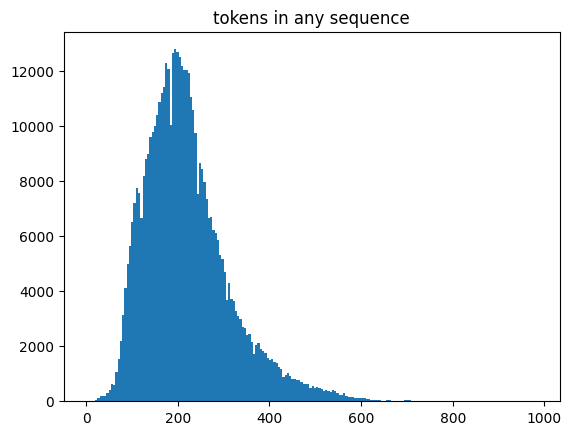

#####################################
mean of tokens 220.78727102938007
median of tokens 206.0


In [ ]:
plt.hist(list_len, bins=200)
plt.title('tokens in any sequence')
plt.show()
print('#####################################')
print(f'mean of tokens {np.average(list_len)}')
print(f'median of tokens {np.median(list_len)}')

In [ ]:
max_len = 300

In [ ]:
X = pad_sequences(encoded, maxlen=max_len, padding = 'post')
X.shape

(487235, 300)

In [ ]:
y = data['generated']
y.shape

(487235,)

In [ ]:
vocab_len = len(np.unique(X))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(f'Train shape : {X_train.shape}')
print(f'Test shape : {X_test.shape}')

Train shape : (389788, 300)
Test shape : (97447, 300)


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_len, output_dim=50, input_length=max_len))
model.add(Dropout(0.5))
model.add(Conv1D(filters=16, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units = 64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 50)           11602900  
                                                                 
 dropout (Dropout)           (None, 300, 50)           0         
                                                                 
 conv1d (Conv1D)             (None, 300, 16)           3216      
                                                                 
 max_pooling1d (MaxPooling1  (None, 150, 16)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2400)              0         
                                                                 
 dropout_1 (Dropout)         (None, 2400)              0         
                                                        

In [ ]:
opt = tf.optimizers.Adam(learning_rate=0.001)
loss = tf.losses.BinaryCrossentropy()
metric = tf.metrics.BinaryAccuracy()
model.compile(optimizer=opt, loss=loss, metrics=metric)

In [ ]:
model.fit(X_train, y_train, batch_size=50, epochs=12, validation_split=0.2, verbose=2)

Epoch 1/6
6237/6237 - 44s - loss: 0.0041 - binary_accuracy: 0.9988 - val_loss: 0.0042 - val_binary_accuracy: 0.9988 - 44s/epoch - 7ms/step
Epoch 2/6
6237/6237 - 45s - loss: 0.0037 - binary_accuracy: 0.9988 - val_loss: 0.0041 - val_binary_accuracy: 0.9990 - 45s/epoch - 7ms/step
Epoch 3/6
6237/6237 - 46s - loss: 0.0037 - binary_accuracy: 0.9989 - val_loss: 0.0038 - val_binary_accuracy: 0.9989 - 46s/epoch - 7ms/step
Epoch 4/6
6237/6237 - 45s - loss: 0.0034 - binary_accuracy: 0.9990 - val_loss: 0.0049 - val_binary_accuracy: 0.9989 - 45s/epoch - 7ms/step
Epoch 5/6
6237/6237 - 45s - loss: 0.0033 - binary_accuracy: 0.9990 - val_loss: 0.0042 - val_binary_accuracy: 0.9988 - 45s/epoch - 7ms/step
Epoch 6/6
6237/6237 - 42s - loss: 0.0033 - binary_accuracy: 0.9991 - val_loss: 0.0046 - val_binary_accuracy: 0.9990 - 42s/epoch - 7ms/step


# evaluation

In [ ]:
model.evaluate(X_test, y_test)

3046/3046 [==============================] - 7s 2ms/step - loss: 0.0044 - binary_accuracy: 0.9990


[0.004361382219940424, 0.9990148544311523]

In [ ]:
y_pred = model.predict(X_test)

3046/3046 [==============================] - 6s 2ms/step


In [ ]:
y_pred = np.round(y_pred)

In [ ]:
print(classification_report(y_pred, y_test, target_names=['Generated by Human', 'Generated by AI']))

                    precision    recall  f1-score   support

Generated by Human       1.00      1.00      1.00     61163
   Generated by AI       1.00      1.00      1.00     36284

          accuracy                           1.00     97447
         macro avg       1.00      1.00      1.00     97447
      weighted avg       1.00      1.00      1.00     97447



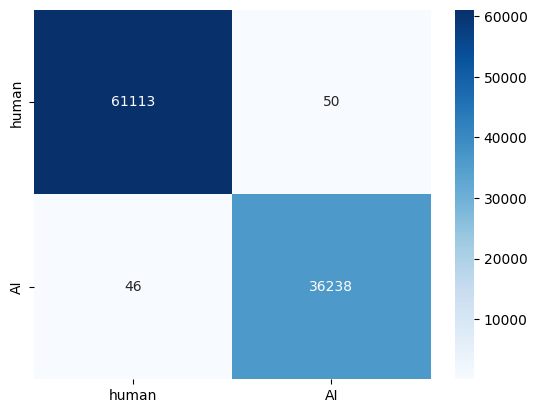

In [ ]:
conf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['human', 'AI'],
    yticklabels=['human', 'AI']
    )
plt.show()